This dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

source :- https://www.kaggle.com/gilsousa/habermans-survival-data-set/data

Now let's import data set

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('haberman.csv')
df.columns=['age_patient','op_year','axil_nodes','surv_status']

In [6]:
df.head()

,age_patient,op_year,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age_patient    306 non-null int64
op_year        306 non-null int64
axil_nodes     306 non-null int64
surv_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [8]:
df.shape

(306, 4)

observations:

This dataset has total 307 entries with no null values.

It mainly gives data about age of the patient, year in which surgery was conducted,number of axil nodes and the survival status of patient after surgery.

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


We have a medical term axil_nodes.
So, let's know briefly what it is

axil_nodes:
The axillary lymph nodes or armpit lymph nodes (20 to 49 in number) drain lymph vessels from the lateral quadrants of the breast, the superficial lymph vessels from thin walls of the chest and the abdomen above the level of the navel, and the vessels from the upper limb. They are divided in several groups according to their location in the armpit. These lymph nodes are clinically significant in breast cancer, and metastases from the breast to the axillary lymph nodes are considered in the staging of the disease.
source:https://en.wikipedia.org/wiki/Axillary_lymph_nodes

In [9]:
df['surv_status'].unique()

array([1, 2], dtype=int64)

In [10]:
df['surv_status'].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

In [44]:
X=list(df.columns[:-1])
X

['age_patient', 'op_year', 'axil_nodes']

## Univariate Analysis

# PDF(Probability Density Function)

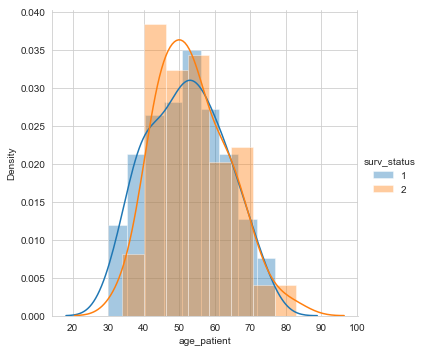

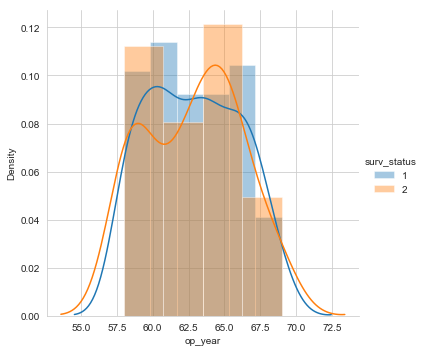

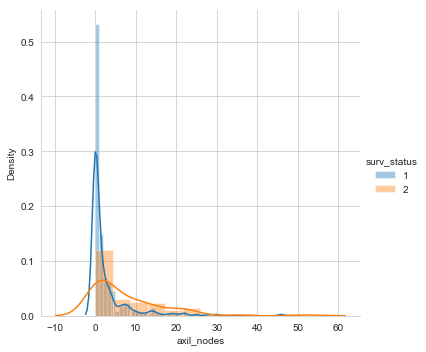

In [45]:
for idx,i in enumerate(X):

    
    sns.FacetGrid(df, hue = "surv_status", height = 5).map(sns.distplot,i).add_legend()
   
    plt.ylabel("Density")
    plt.show()
   

observations:
1. In all plots features are overlaping masively.
2. It can be observed that more people who did not survive are younger than those who survived.
3. The number of positive lymph nodes of the survivors is highly densed from 0 to 5.

# CDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


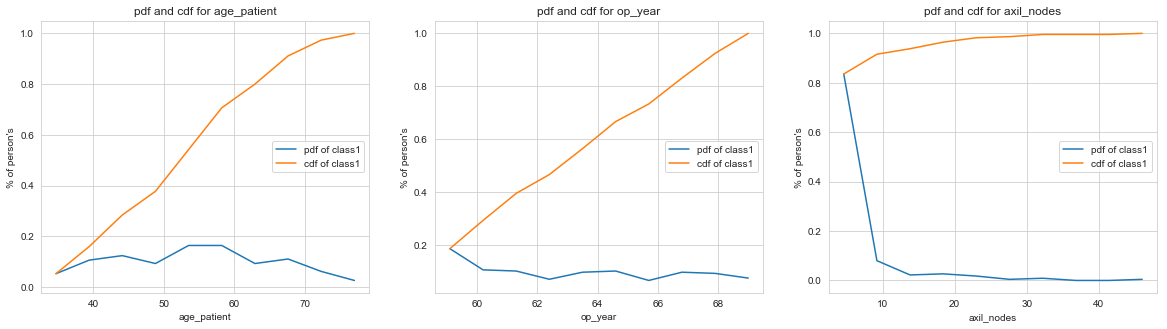

In [46]:
plt.figure(figsize=(20,5))
one=df.loc[df['surv_status']==1]
two=df.loc[df['surv_status']==2]
label=['pdf of class1','cdf of class1']
for idx,i in enumerate(X):
    counts,bin_edges=np.histogram(one[i],bins=10,density=True)
    pdf=counts/(sum(counts))
    print(pdf)
    print(bin_edges)
    cdf=np.cumsum(pdf)
    plt.subplot(1, 3, idx+1)
    plt.title("pdf and cdf for "+i)
    plt.xlabel(i)
    plt.ylabel("% of person's")
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.legend(label,loc=7)



    
  
    


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


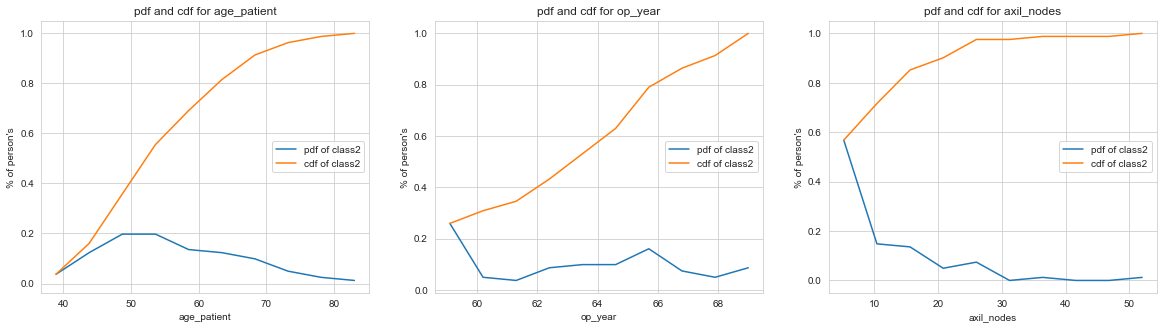

In [47]:
plt.figure(figsize=(20,5))
label=['pdf of class2','cdf of class2']
for idx,i in enumerate(X):
    counts,bin_edges=np.histogram(two[i],bins=10,density=True)
    pdf=counts/(sum(counts))
    print(pdf)
    print(bin_edges)
    cdf=np.cumsum(pdf)
    plt.subplot(1, 3, idx+1)
    plt.title("pdf and cdf for "+i)
    plt.xlabel(i)
    plt.ylabel("% of person's")
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.legend(label,loc=7)

Box Plots

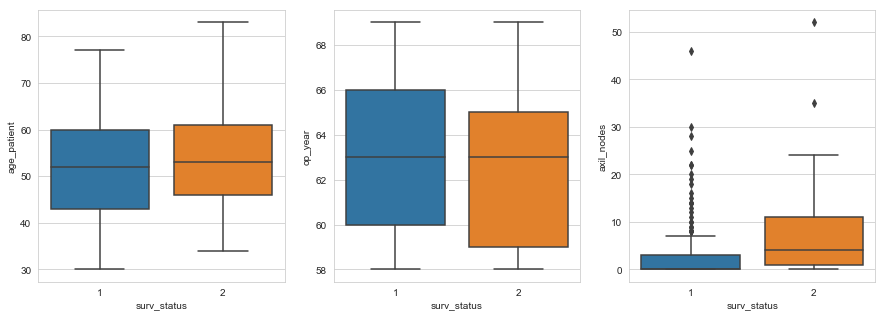

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, i in enumerate(X):
    sns.boxplot( x='surv_status', y=i, data=df, ax=axes[idx])
plt.show()  

Violin Plots

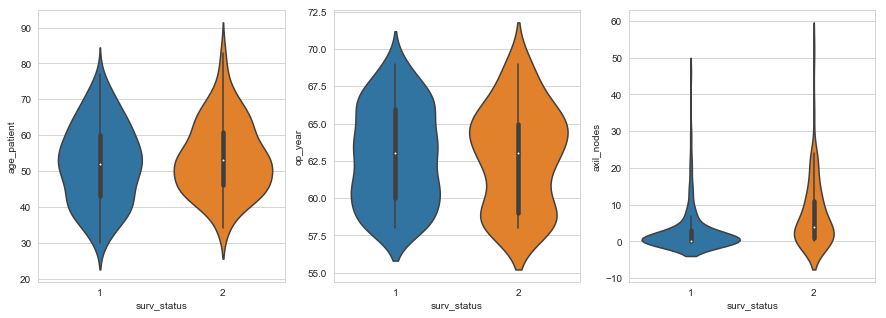

In [50]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
for idx,i in enumerate(X):
    sns.violinplot(x='surv_status',y=i,data=df, ax=axes[idx])

observations:
1. Almost 80% of the patients have less than or equal to 5 positive auxillary lymph node.
2. About 58% of patients with less than 5 positive auxillary nodes died within 5 years.



# Multivariate analysis

## Pair plot

G:\Anaco\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
G:\Anaco\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


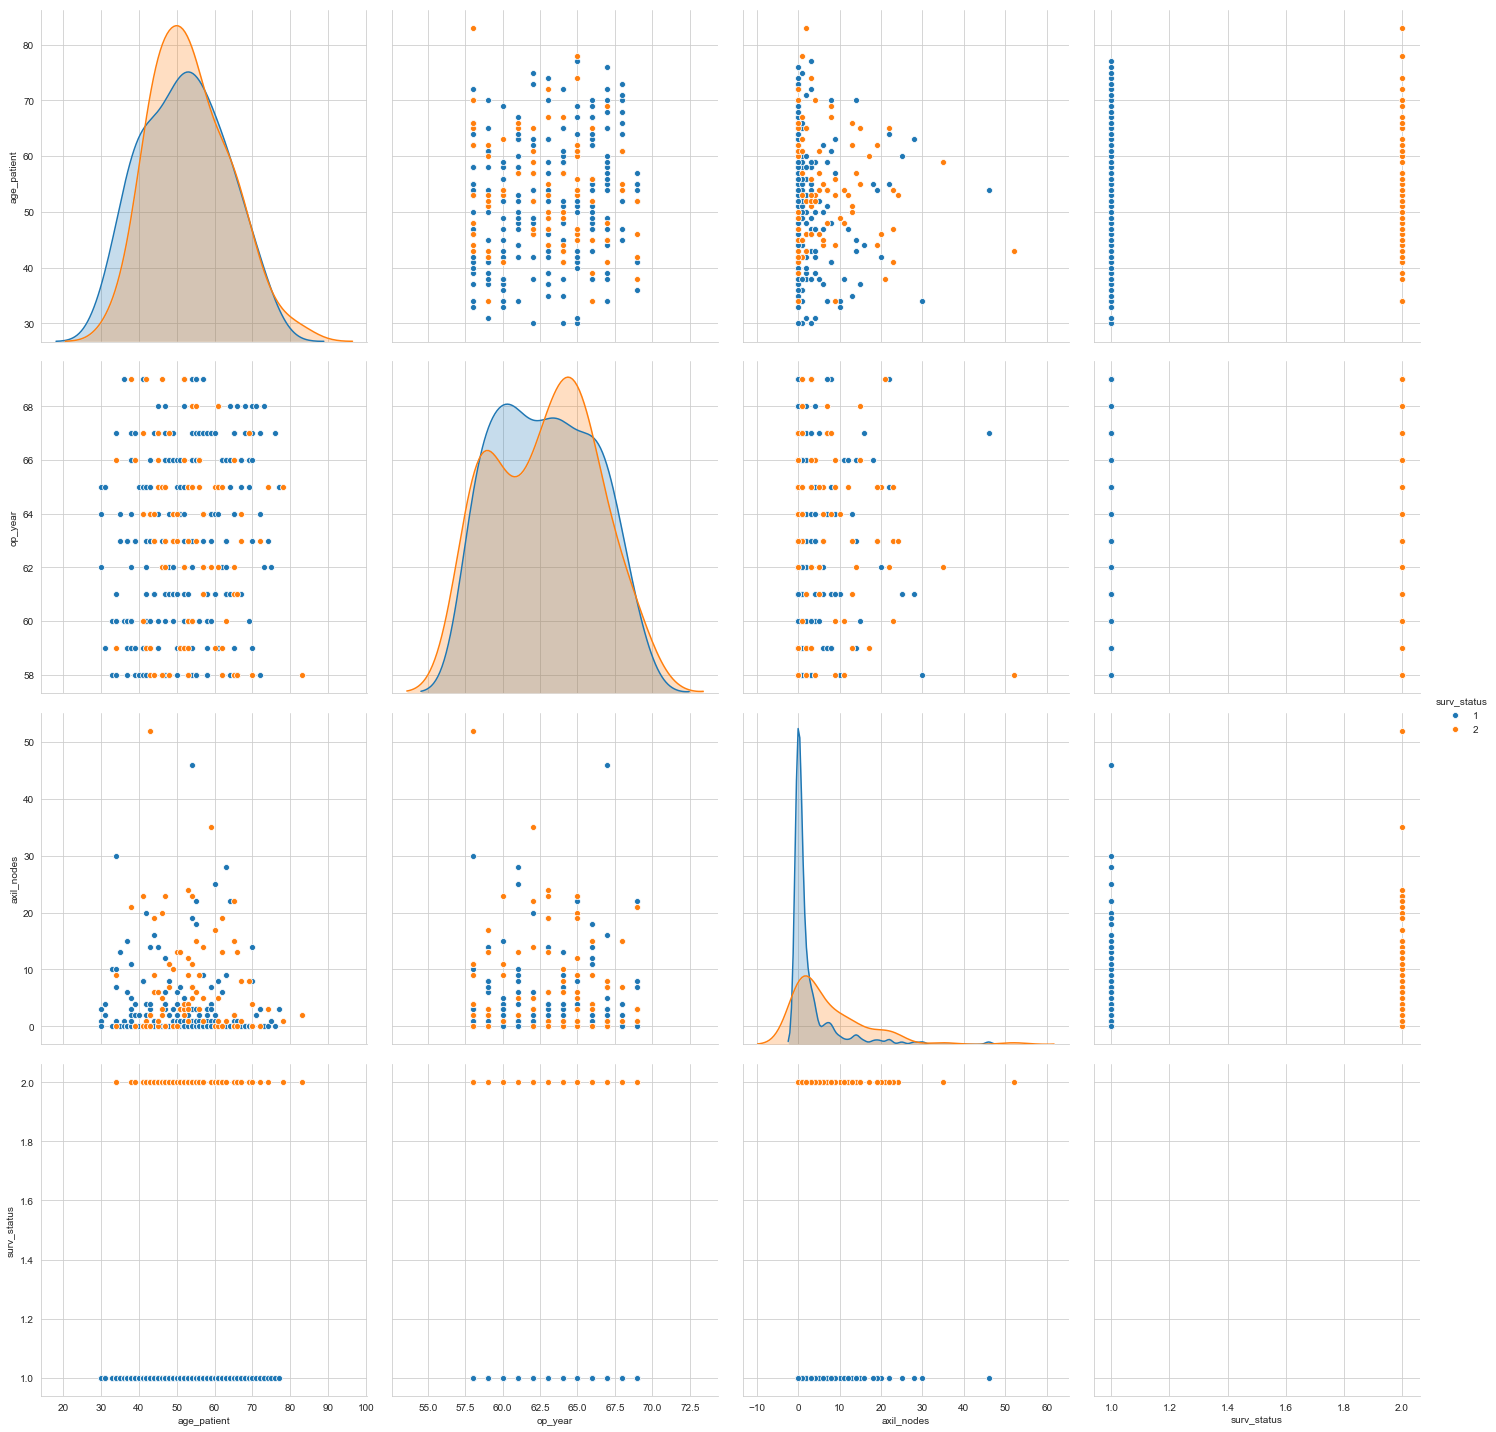

In [59]:
sns.pairplot(data=df,hue='surv_status',height=5)
plt.show()

observation:
It is not possible to classify clearly which is the most useful feature because of too much overlapping.

Conclusion:

1. The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
2. The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.